In [1]:
#Installing Nececcary Libraries With Messages Supressed
suppressPackageStartupMessages({
    library(tidyverse)
    library(repr)
    library(tidymodels)
})

options(repr.matrix.max.rows = 10)

#Set seed to make random results reproducible 
set.seed(13) 

#changing the default graph size:
options(repr.plot.width=10, repr.plot.height=8)

In [2]:
#Importing Heart Disease data from the UC Irvine Repository

url <- "https://archive.ics.uci.edu/static/public/45/heart+disease.zip"
temp <- tempfile()
download.file(url, temp)
data.hungary <- read.csv(unz(temp, "processed.hungarian.data"))
unlink(temp)

In [3]:
formatted_heart_disease<-data.hungary |> 
    #renaming columns 
    rename(age = X28, sex = X1, chest_pain_type = X2, resting_bp = X130, 
        cholesterol = X132, fasting_blood_sugar = X0, resting_ekg = X2.1, max_hr = X185, exercise_induced_angina = X0.1, 
        ST_drop_exercise = X0.2, ST_slope = X., fluoroscopy_count = X..1, thalassemia_type = X..2, vessel_narrow = X0.3
    )|>
    #transofrming variables from <char> to <int> or <fct>
    transform(resting_bp = as.integer(resting_bp), cholesterol = as.integer(cholesterol), 
        fasting_blood_sugar = as.integer(fasting_blood_sugar), resting_ekg = as.integer(resting_ekg), max_hr = as.integer(max_hr), 
        exercise_induced_angina = as.integer(exercise_induced_angina), ST_slope = as.integer(ST_slope),
        fluoroscopy_count = as.integer(fluoroscopy_count),thalassemia_type = as.integer(thalassemia_type), 
        vessel_narrow = as.factor(vessel_narrow), sex=as.integer(sex),chest_pain_type=as.integer(chest_pain_type))


Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”
Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”
Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”
Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”
Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”
Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”
Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”
Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”
Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”


In [4]:
#Before proceeding further into analyzing the data, we need to split it into a training and testing set. The testing set will not be analyzed and will be set aside for testing later.
# %75 of data will be used for testing and the remaining %25 for training
heart_disease_split<-initial_split(formatted_heart_disease, prop=0.75, strata=vessel_narrow)
heart_disease_train<-training(heart_disease_split)
heart_disease_test<-testing(heart_disease_split)

In [5]:
#According to the db: 
    #sex (1 = male; 0 = female)

    #chest pain type:
            # -- Value 1: typical angina
            # -- Value 2: atypical angina
            # -- Value 3: non-anginal pain
            # -- Value 4: asymptomatic

    #exercise induced angina (1 = yes; 0 = no)

    #esting electrocardiographic results
            # -- Value 0: normal
            # -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
            # -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

    #(fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)

    #slope: the slope of the peak exercise ST segment
    #         -- Value 1: upsloping
    #         -- Value 2: flat
    #         -- Value 3: downsloping

    #thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

    #num: diagnosis of heart disease (angiographic disease status)
            # -- Value 0: < 50% diameter narrowing
            # -- Value 1: > 50% diameter narrowing
            # (in any major vessel: attributes 59 through 68 are vessels)

#Refactoring the above categorical variables to make the data more readable and easier to work with:
refactored_heart_disease<-heart_disease_train|>
    transform(resting_bp = as.integer(resting_bp), cholesterol = as.integer(cholesterol), 
        fasting_blood_sugar = as.factor(fasting_blood_sugar), resting_ekg = as.factor(resting_ekg), max_hr = as.integer(max_hr), 
        exercise_induced_angina = as.factor(exercise_induced_angina), ST_slope = as.factor(ST_slope),
        fluoroscopy_count = as.integer(fluoroscopy_count),thalassemia_type = as.factor(thalassemia_type), 
        vessel_narrow = as.factor(vessel_narrow), sex=as.factor(sex),chest_pain_type=as.factor(chest_pain_type
    ))|>
    mutate(sex=fct_recode(sex, "male"="1", "female"="0"
    ))|>
    mutate(chest_pain_type=fct_recode(chest_pain_type,
        "typical_angina"="1",
        "atypical_angina"="2",
        "non_anginal_pain"="3",
        "asymptomatic"="4"
    ))|>
    mutate(exercise_induced_angina=fct_recode(exercise_induced_angina,
        "yes"="1",
        "no"="0"
    ))|>
    mutate(resting_ekg=fct_recode(resting_ekg,
        "normal"="0",
        "ST-T_wave_abnormality"="1",
        "left_ventricular_hypertrophy"="2"
    ))|>
    mutate(fasting_blood_sugar=fct_recode(fasting_blood_sugar,
        "above120mg/dl"="1",
        "below120mg/dl"="0"
    ))|>
    mutate(ST_slope=fct_recode(ST_slope,
        "upsloping"="1",
        "flat"="2",
        "downsloping"="3"
    ))|>
    mutate(thalassemia_type=fct_recode(thalassemia_type,
        "normal"="3",
        "fixed_defect"="6",
        "reversable_defect"="7")
    )|>
    mutate(vessel_narrow=fct_recode(vessel_narrow,
        "below_50%of_d"="0",
        "above_50%of_d"="1"))
    
        
formatted_heart_disease


age,sex,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,resting_ekg,max_hr,exercise_induced_angina,ST_drop_exercise,ST_slope,fluoroscopy_count,thalassemia_type,vessel_narrow
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<fct>
29,1,2,120,243,0,0,160,0,0,NA,NA,NA,0
29,1,2,140,NA,0,0,170,0,0,NA,NA,NA,0
30,0,1,170,237,0,1,170,0,0,NA,NA,6,0
31,0,2,100,219,0,1,150,0,0,NA,NA,NA,0
32,0,2,105,198,0,0,165,0,0,NA,NA,NA,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
52,1,4,160,331,0,0,94,1,2.5,NA,NA,NA,1
54,0,3,130,294,0,1,100,1,0.0,2,NA,NA,1
56,1,4,155,342,1,0,150,1,3.0,2,NA,NA,1


In [6]:
#The table with 265 rows the missing data for thalassemia type

summarized_table <- formatted_heart_disease |>
                    filter(thalassemia_type == '?') 

summarized_table               

age,sex,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,resting_ekg,max_hr,exercise_induced_angina,ST_drop_exercise,ST_slope,fluoroscopy_count,thalassemia_type,vessel_narrow
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<fct>


In [7]:
#The table with 28 rows with no missing data for thalassemia type

summarized_table_no_missing_data <- formatted_heart_disease |>
                    filter(thalassemia_type != '?') 

summarized_table_no_missing_data 

age,sex,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,resting_ekg,max_hr,exercise_induced_angina,ST_drop_exercise,ST_slope,fluoroscopy_count,thalassemia_type,vessel_narrow
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<fct>
30,0,1,170,237,0,1,170,0,0,NA,NA,6,0
36,1,3,112,340,0,0,184,0,1,2,NA,3,0
37,1,4,120,223,0,0,168,0,0,NA,NA,3,0
43,0,3,150,NA,0,0,175,0,0,NA,NA,3,0
46,1,4,110,238,0,1,140,1,1,2,NA,3,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
50,1,4,130,233,0,0,121,1,2.0,2,NA,7,1
54,1,3,120,237,0,0,150,1,1.5,NA,NA,7,1
43,1,4,120,175,0,0,120,1,1.0,2,NA,7,1


In [8]:
#The table with 189 rows the missing data for thalassemia type

summarized_table_st_slope <- formatted_heart_disease |>
                    filter(ST_slope == '?') 

summarized_table_st_slope 

age,sex,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,resting_ekg,max_hr,exercise_induced_angina,ST_drop_exercise,ST_slope,fluoroscopy_count,thalassemia_type,vessel_narrow
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<fct>


In [9]:
#The table with 104 rows with no missing data for thalassemia type

summarized_table_ST_slope_not_missing <- formatted_heart_disease |>
                    filter(ST_slope != '?') 

summarized_table_ST_slope_not_missing

age,sex,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,resting_ekg,max_hr,exercise_induced_angina,ST_drop_exercise,ST_slope,fluoroscopy_count,thalassemia_type,vessel_narrow
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<fct>
36,1,3,112,340,0,0,184,0,1.0,2,NA,3,0
39,1,2,120,NA,0,1,146,0,2.0,1,NA,NA,0
39,1,2,120,200,0,0,160,1,1.0,2,NA,NA,0
42,1,3,120,228,0,0,152,1,1.5,2,NA,NA,0
44,1,2,120,184,0,0,142,0,1.0,2,NA,NA,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
52,1,4,140,266,0,0,134,1,2,2,NA,NA,1
54,0,3,130,294,0,1,100,1,0,2,NA,NA,1
56,1,4,155,342,1,0,150,1,3,2,NA,NA,1


In [10]:
#Before proceeding further into analyzing the data, we need to split it into a training and testing set. The testing set will not be analyzed and will be set aside for testing later.
# %75 of data will be used for testing and the remaining %25 for training
heart_disease_split<-initial_split(formatted_heart_disease, prop=0.75, strata=vessel_narrow)
heart_disease_train<-training(heart_disease_split)
heart_disease_test<-testing(heart_disease_split)


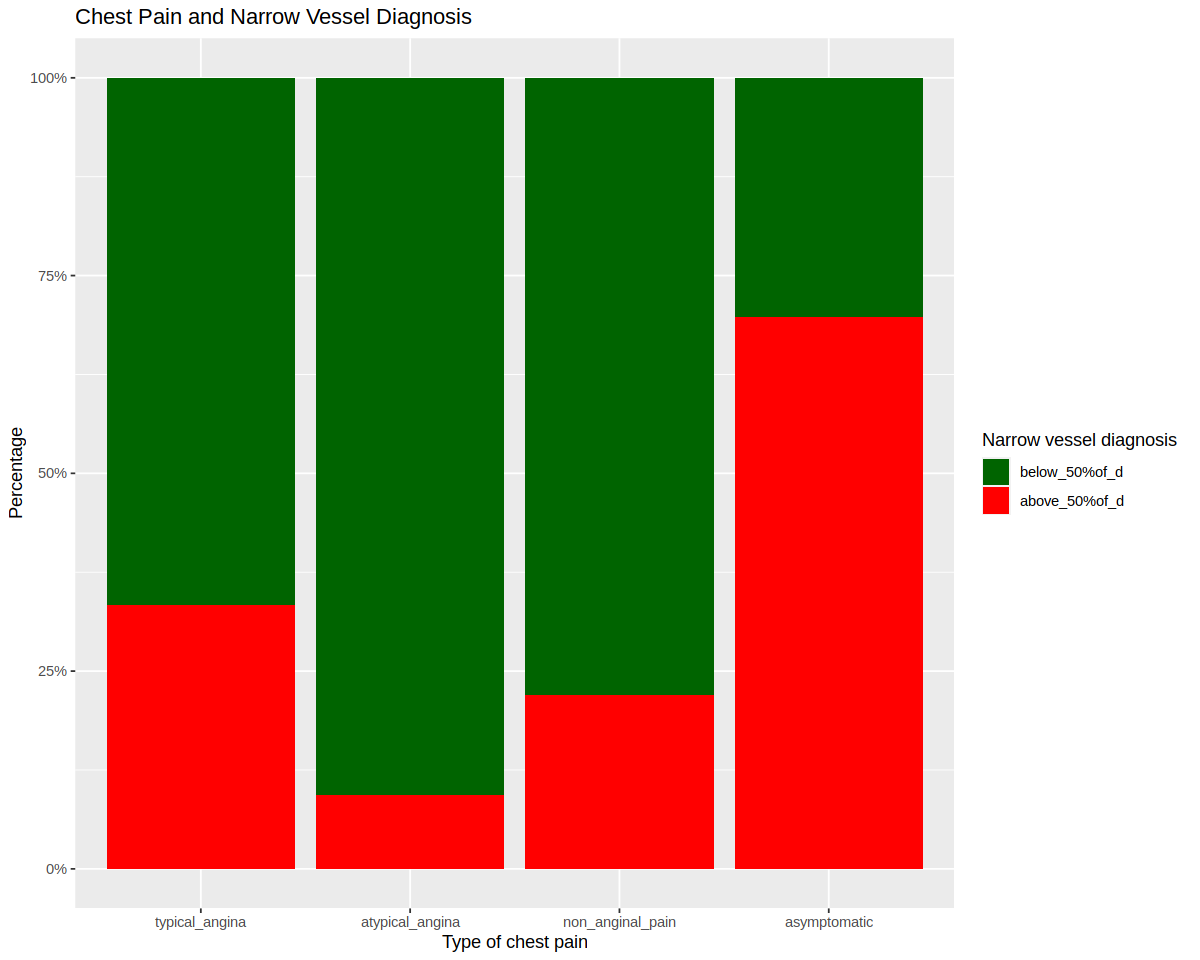

In [11]:
#Exploring The Relationship Between Chest Pain Type and narrow vessel diagnostic:
pain_vessel_graph<-refactored_heart_disease|>
    ggplot(aes(x=chest_pain_type, fill=vessel_narrow))+
        geom_bar(position="fill")+
        scale_y_continuous(labels = percent_format(scale = 100)) +
        ylab("Percentage")+
        labs( title = "Chest Pain and Narrow Vessel Diagnosis", x="Type of chest pain", fill="Narrow vessel diagnosis")+
        scale_fill_manual(values=c("darkgreen","red"))
        

pain_vessel_graph

From the bar plot above, we can see that most heart disease diagnoses are associated with typical angina pain or asymptomatic pain. It is also clear that chest pain type can be useful for predicting the heart disease diagnosis. 

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


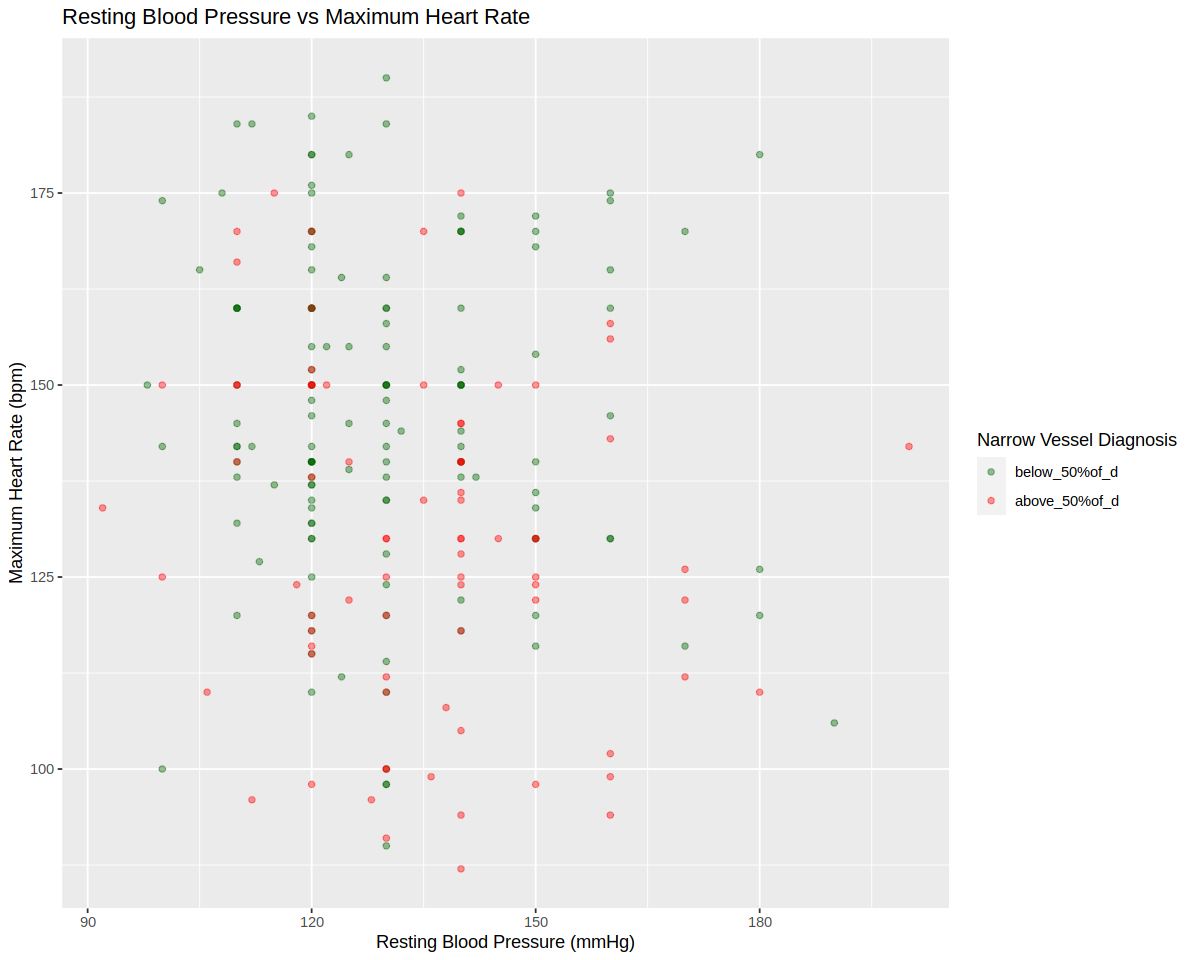

In [12]:
#Exploring the relationship between resting blood pressure, maximum heart rate and the narrow vesel diagnosis:
restingbp_maxhr_graph<-refactored_heart_disease|>
    ggplot(aes(x=resting_bp, y=max_hr, color=vessel_narrow))+
        geom_point(alpha=0.4)+
        labs(title="Resting Blood Pressure vs Maximum Heart Rate", x="Resting Blood Pressure (mmHg)", y="Maximum Heart Rate (bpm)", color="Narrow Vessel Diagnosis")+
        scale_color_manual(values=c("darkgreen","red"))

restingbp_maxhr_graph

Warning message:
“Removed 17 rows containing missing values (`geom_point()`).”


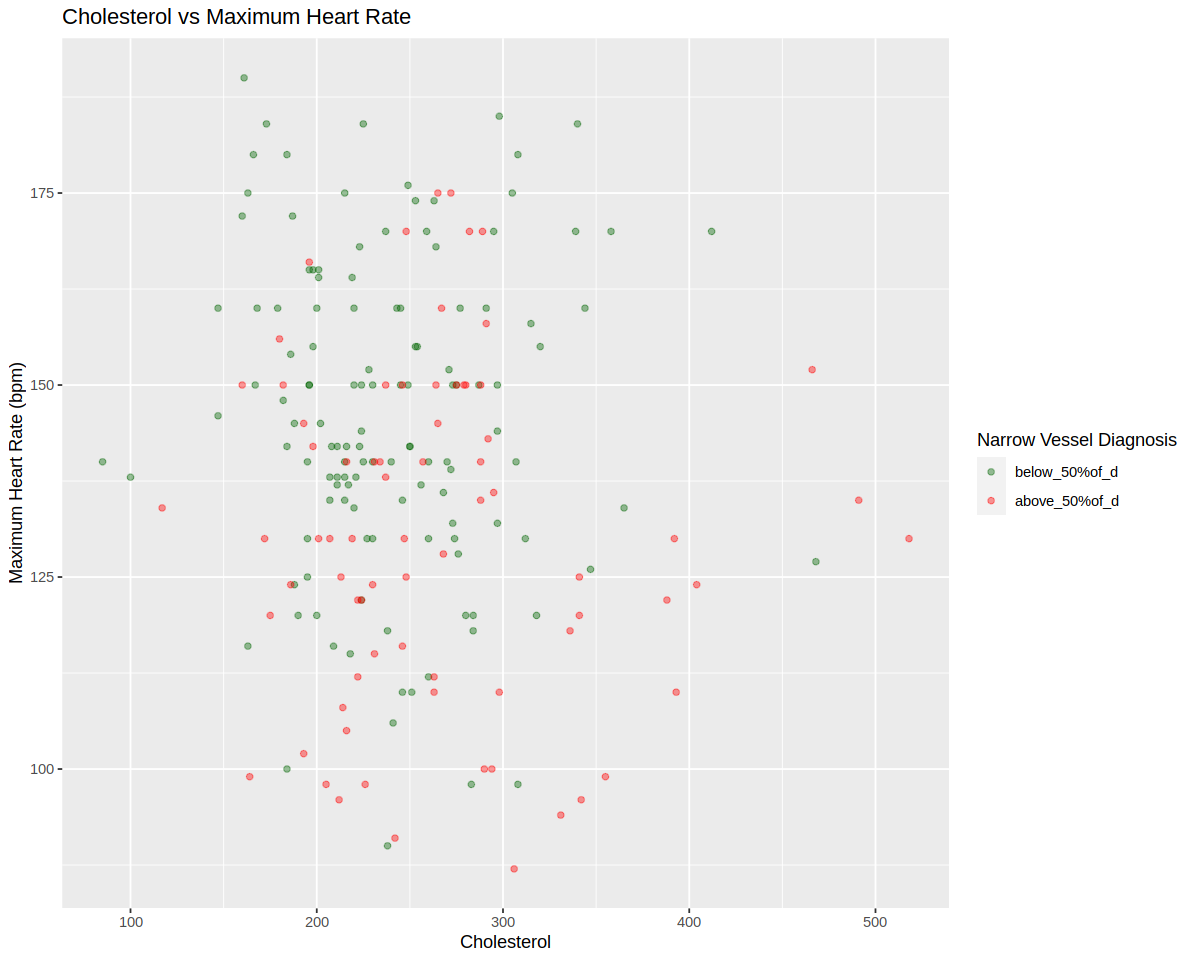

In [19]:
#Exploring the relationship between Cholesterol, maximum heart rate and the narrow vesel diagnosis:
cholesterol_maxhr_graph <- refactored_heart_disease|>
    ggplot(aes(x= cholesterol, y=max_hr, color=vessel_narrow))+
        geom_point(alpha=0.4)+
        labs(title="Cholesterol vs Maximum Heart Rate", x="Cholesterol", y="Maximum Heart Rate (bpm)", color="Narrow Vessel Diagnosis")+
        scale_color_manual(values=c("darkgreen","red"))

cholesterol_maxhr_graph

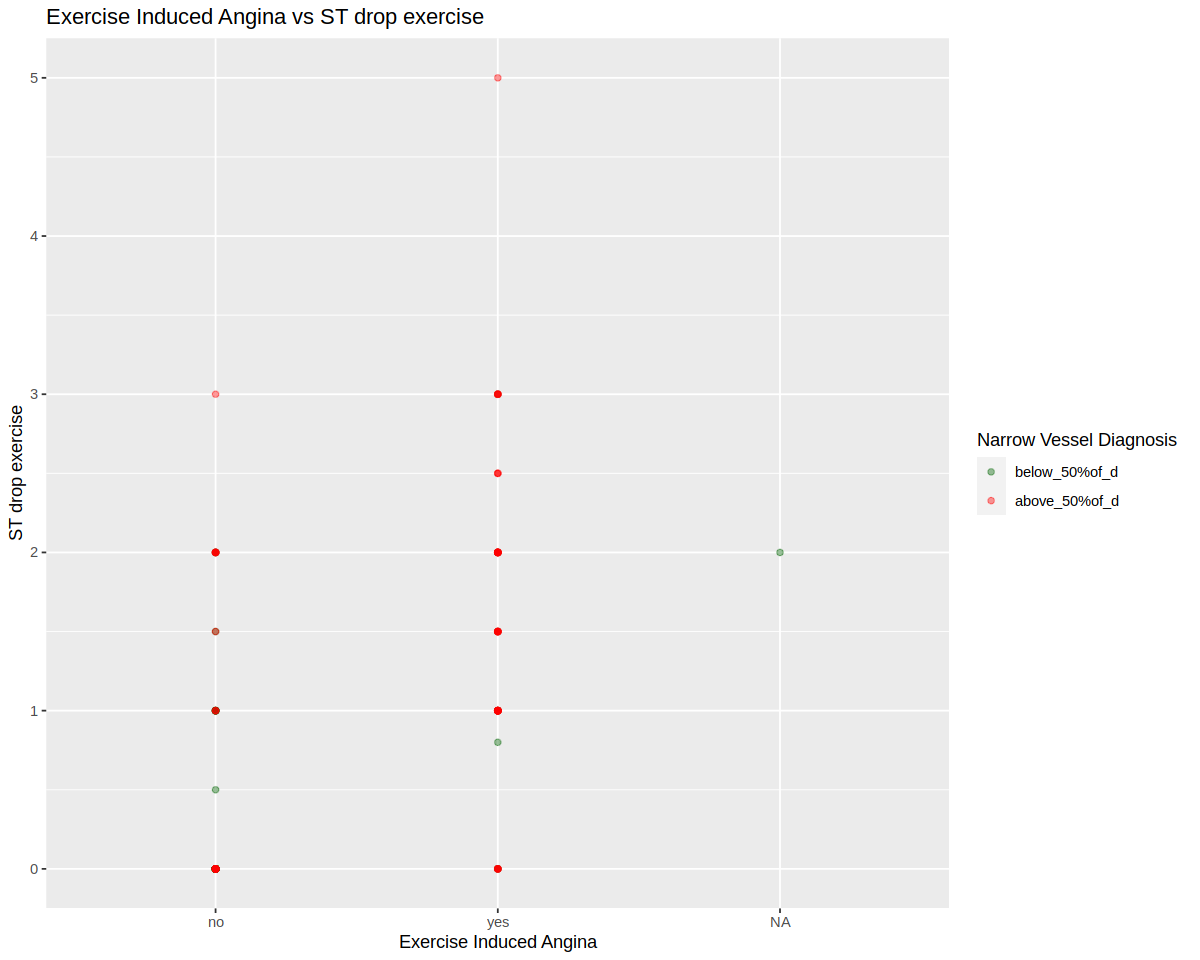

In [18]:
#Exploring the relationship between exercise induced angina, ST drop exercise and the narrow vesel diagnosis:
Angina_ST_graph <- refactored_heart_disease|>
    ggplot(aes(x= exercise_induced_angina, y=ST_drop_exercise, color=vessel_narrow))+
        geom_point(alpha=0.4)+
        labs(title="Exercise Induced Angina vs ST drop exercise", x="Exercise Induced Angina", y="ST drop exercise", color="Narrow Vessel Diagnosis")+
        scale_color_manual(values=c("darkgreen","red"))

Angina_ST_graph

In [14]:
#Using forward selection, determine what set of predictors will result in the highest accuracy 
#KNN classificaiton 
#removing predictors with too many missing values 
heart_disease_train<-select(heart_disease_train, -ST_slope, -fluoroscopy_count,-thalassemia_type)
#removing rows with missing values
heart_disease_train <- na.omit(heart_disease_train)
#installing the kknn package
install.packages("kknn")

#extracting all the potential predictors from the data frame except for the categorical label variable vessel_narrow
names<-colnames(heart_disease_train |>select(-vessel_narrow))



#make an empty tibble for storing accuracies (used later)
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

#make your standard knn specification - every neighbour gets same vote power, classification problem, kknn engine 
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

heart_vfold <- vfold_cv(heart_disease_train, v = 2, strata = vessel_narrow)


number_of_predictors <- length(names)

# store the selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (index in 1:number_of_predictors) {
    # for every predictor:
    accuracy <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("vessel_narrow", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        heart_recipe <- recipe(as.formula(model_string), 
                            data = heart_disease_train) |>
                            step_scale(all_predictors()) |>
                            step_center(all_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() |>
          add_recipe(heart_recipe) |>
          add_model(knn_spec) |>
          tune_grid(resamples = heart_vfold, grid = 10) |>
          collect_metrics() |>
          filter(.metric == "accuracy") |>
          summarize(mx = max(mean))
        acc <- acc$mx |> unlist()

        # add this result to the dataframe
        accuracy[[j]] <- acc
        models[[j]] <- model_string
    }
    jbest <- which.max(unlist(accuracy))
    accuracies <- accuracies |> 
      add_row(size = index, 
              model_string = models[[jbest]], 
              accuracy = accuracy[[jbest]])
    selected <- c(selected, names[[jbest]])
    names <- names[-jbest]
}
accuracies



Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



size,model_string,accuracy
<int>,<chr>,<dbl>
1,vessel_narrow ~ ST_drop_exercise,0.7816430
2,vessel_narrow ~ ST_drop_exercise+chest_pain_type,0.8173057
3,vessel_narrow ~ ST_drop_exercise+chest_pain_type+resting_bp,0.8376108
4,vessel_narrow ~ ST_drop_exercise+chest_pain_type+resting_bp+resting_ekg,0.8579159
5,vessel_narrow ~ ST_drop_exercise+chest_pain_type+resting_bp+resting_ekg+sex,0.8781694
6,vessel_narrow ~ ST_drop_exercise+chest_pain_type+resting_bp+resting_ekg+sex+age,0.8730674
7,vessel_narrow ~ ST_drop_exercise+chest_pain_type+resting_bp+resting_ekg+sex+age+cholesterol,0.8730674
8,vessel_narrow ~ ST_drop_exercise+chest_pain_type+resting_bp+resting_ekg+sex+age+cholesterol+fasting_blood_sugar,0.8477118
9,vessel_narrow ~ ST_drop_exercise+chest_pain_type+resting_bp+resting_ekg+sex+age+cholesterol+fasting_blood_sugar+exercise_induced_angina,0.8479180


In [15]:
most_accurate_predictors<-slice_max(accuracies, accuracy, n=1)
most_accurate_predictors

size,model_string,accuracy
<int>,<chr>,<dbl>
5,vessel_narrow ~ ST_drop_exercise+chest_pain_type+resting_bp+resting_ekg+sex,0.8781694
